Gathered from: https://github.com/ACM-Research/stress-diagnosis-neural-networks/tree/main

# Importing Necessary Libraries

In [1]:
pip install --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
#importing all the necessary liraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras. layers import Activation
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical, plot_model


# Loading Data

In [3]:
#Loading dataset
trainDataSet = pd.read_csv(r"C:\Users\Olsen\Desktop\Masteroppgave\Data\fitfiler\candidate1\HRV_export\features_complete\train.csv")

In [4]:
#displaying data sample
trainDataSet.head()

,File,MEAN_RR,MEDIAN_RR,SDRR,RMSS,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,Feeling
0,candidate1_HRV_2023-06-02_rowing_5.0,453.723333,451.0,17.374788,2.922196,2.212125,5.945797,132.239177,0.166945,0.0,...,14.893395,96.749290,0.674586,0.500408,3.250710,134.807295,29.762507,0.033599,0.199874,1
1,candidate1_HRV_2023-06-02_rowing_5.0,452.988333,447.0,17.369351,2.924766,2.214080,5.938714,132.453742,0.166945,0.0,...,13.193653,95.919108,0.724861,0.561326,4.080892,129.133747,23.504445,0.042545,0.202937,1
2,candidate1_HRV_2023-06-02_rowing_5.0,452.075833,444.0,17.559477,2.918338,2.209908,6.016945,132.721096,0.166945,0.0,...,12.361087,95.420175,0.682555,0.593288,4.579825,115.046136,20.834893,0.047996,0.199374,1
3,candidate1_HRV_2023-06-02_rowing_5.0,451.152500,443.0,17.779079,2.923767,2.204043,6.080881,132.992724,0.166945,0.0,...,14.356077,96.644962,0.709063,0.498372,3.355038,142.275675,28.805918,0.034715,0.195158,1
4,candidate1_HRV_2023-06-02_rowing_5.0,450.157500,443.0,18.132529,2.924909,2.208472,6.199348,133.286683,0.166945,0.0,...,12.423568,95.951520,0.730439,0.524187,4.048480,139.346917,23.700626,0.042193,0.198497,1


In [5]:
#loading test sample
testDataSet = pd.read_csv(r"C:\Users\Olsen\Desktop\Masteroppgave\Data\fitfiler\candidate1\HRV_export\features_complete\test.csv")

In [6]:
#displaying test sample
testDataSet.head()

,File,MEAN_RR,MEDIAN_RR,SDRR,RMSS,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,Feeling
0,candidate1_HRV_2023-05-18_rowing_3.0,470.234583,452.0,43.426070,6.206232,5.247075,6.997171,127.595890,1.168614,0.166945,...,14.004588,82.758345,13.263871,2.917679,17.241655,454.603515,4.799907,0.208337,0.088642,2
1,candidate1_HRV_2023-05-18_rowing_3.0,468.284583,450.0,43.762482,6.206770,5.251940,7.050765,128.127216,1.168614,0.166945,...,14.164324,82.866549,14.168398,2.928609,17.133451,483.792678,4.836536,0.206760,0.090009,2
2,candidate1_HRV_2023-05-18_rowing_3.0,466.347917,449.0,44.436045,6.236287,5.252919,7.125401,128.659307,1.168614,0.166945,...,11.397993,82.454589,11.846521,2.425365,17.545411,488.442793,4.699496,0.212789,0.088309,2
3,candidate1_HRV_2023-05-18_rowing_3.0,464.704583,448.0,45.099490,6.232940,5.250010,7.235669,129.114285,1.168614,0.166945,...,12.261165,82.398187,13.908719,2.619217,17.601813,531.025849,4.681233,0.213619,0.075776,2
4,candidate1_HRV_2023-05-18_rowing_3.0,464.054583,446.0,45.357981,6.221412,5.255526,7.290625,129.295135,1.168614,0.166945,...,12.813486,82.941348,13.919369,2.635366,17.058652,528.175980,4.862128,0.205671,0.073860,2


In [7]:
#Looking for the shape of test data set
testDataSet.shape

(7456, 27)

In [8]:
# # MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50'

# testDataSet = testDataSet[['MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50','condition', 'datasetId']]

# testDataSet

In [9]:
#checking if there are any null values
testDataSet.isnull().sum()

File          0
MEAN_RR       0
MEDIAN_RR     0
SDRR          0
RMSS          0
SDSD          0
SDRR_RMSSD    0
HR            0
pNN25         0
pNN50         0
SD1           0
SD2           0
KURT          0
SKEW          0
VLF           0
VLF_PCT       0
LF            0
LF_PCT        0
LF_NU         0
HF            0
HF_PCT        0
HF_NU         0
TP            0
LF_HF         0
HF_LF         0
sampen        0
Feeling       0
dtype: int64

# Preprocessing

In [10]:
# trainDataSet = trainDataSet[['MEAN_RR', 'SDRR', 'RMSSD','SDSD', 'SDRR_RMSSD','HR', 'pNN25','pNN50', 'condition', 'datasetId']]

# #Droping unnecessary columns
trainSamples = trainDataSet.drop(['File'], axis = 1)
trainSamples = trainSamples.drop(['Feeling'], axis = 1)


# trainSamples = trainSamples.drop(['MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'], axis=1)

In [11]:
trainSamples

,MEAN_RR,MEDIAN_RR,SDRR,RMSS,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen
0,453.723333,451.0,17.374788,2.922196,2.212125,5.945797,132.239177,0.166945,0.0,2.066219,...,20.077383,14.893395,96.749290,0.674586,0.500408,3.250710,134.807295,29.762507,0.033599,0.199874
1,452.988333,447.0,17.369351,2.924766,2.214080,5.938714,132.453742,0.166945,0.0,2.067944,...,17.037458,13.193653,95.919108,0.724861,0.561326,4.080892,129.133747,23.504445,0.042545,0.202937
2,452.075833,444.0,17.559477,2.918338,2.209908,6.016945,132.721096,0.166945,0.0,2.063330,...,14.220953,12.361087,95.420175,0.682555,0.593288,4.579825,115.046136,20.834893,0.047996,0.199374
3,451.152500,443.0,17.779079,2.923767,2.204043,6.080881,132.992724,0.166945,0.0,2.067252,...,20.425205,14.356077,96.644962,0.709063,0.498372,3.355038,142.275675,28.805918,0.034715,0.195158
4,450.157500,443.0,18.132529,2.924909,2.208472,6.199348,133.286683,0.166945,0.0,2.068029,...,17.311859,12.423568,95.951520,0.730439,0.524187,4.048480,139.346917,23.700626,0.042193,0.198497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,500.521667,500.0,7.367471,2.816875,1.845922,2.615477,119.874930,0.000000,0.0,1.991472,...,14.515776,47.993709,86.958070,2.177069,7.198074,13.041930,30.245163,6.667577,0.149980,1.097388
28935,499.658333,499.5,7.121786,2.819841,1.861988,2.525598,120.082056,0.000000,0.0,1.993310,...,14.882655,39.844166,84.037772,2.826828,7.568045,15.962228,37.352155,5.264790,0.189941,1.108900
28936,498.463333,498.0,6.766679,2.856665,1.894978,2.368734,120.369937,0.000000,0.0,2.018549,...,12.124465,35.139677,85.769503,2.011638,5.830220,14.230497,34.503631,6.027162,0.165916,1.115113
28937,497.696667,498.0,6.777742,2.787934,1.836423,2.431098,120.555358,0.000000,0.0,1.970680,...,10.804933,34.583982,86.647553,1.665048,5.329415,13.352447,31.242595,6.489264,0.154101,1.136679


In [12]:
trainSamples.shape


(28939, 25)

In [13]:
# testDataSet['condition'] = testDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})
print('Test')

# Verify the changes
print(testDataSet['Feeling'].value_counts())
print(testDataSet['Feeling'].size)
print('')

print('Train')

# trainDataSet['condition'] = trainDataSet['condition'].replace({'interruption': 'stress', 'time pressure': 'stress'})

# Verify the changes
print(trainDataSet['Feeling'].value_counts())
print(trainDataSet['Feeling'].size)

# print(41033+369289)

# print(trainDataSet['Feeling'].value_counts()+testDataSet['Feeling'].value_counts())

Test
2    4644
1    2812
Name: Feeling, dtype: int64
7456

Train
2    18920
1    10019
Name: Feeling, dtype: int64
28939


# Extracting labels from train and test dataset

In [14]:
trainLabels = trainDataSet['Feeling']

In [15]:
trainLabels = pd.get_dummies(trainDataSet['Feeling'])

In [16]:
trainLabels



,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
28934,1,0
28935,1,0
28936,1,0
28937,1,0


In [17]:
trainlabels1 = trainDataSet['Feeling']
labelencoder = LabelEncoder()
trainLabels1 = labelencoder.fit_transform(trainDataSet["Feeling"])

In [18]:
testSamples = testDataSet.drop(['Feeling'], axis = 1)
testSamples = testSamples.drop(['File'], axis = 1)
# testSamples = testSamples.drop(['MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'], axis=1)

In [19]:
testLabels = testDataSet['Feeling']

In [20]:
testLabels= pd.get_dummies(testDataSet['Feeling'])

In [21]:
testlabels1 = testDataSet['Feeling']
labelencoder = LabelEncoder()
testLabels1 = labelencoder.fit_transform(testDataSet["Feeling"])

In [22]:
testLabels1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
testLabels

,1,2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
7451,0,1
7452,0,1
7453,0,1
7454,0,1


# Normalization

In [24]:
#Normalizing using Min Max Scaler
scaling = MinMaxScaler(feature_range=(0,1))
trainSamples = scaling.fit_transform(trainSamples)

In [25]:
trainSamples

array([[0.34833233, 0.33947368, 0.07808723, ..., 0.31904481, 0.00288161,
        0.08041636],
       [0.34638916, 0.32894737, 0.07806035, ..., 0.25167525, 0.00400984,
        0.08166776],
       [0.34397672, 0.32105263, 0.07900039, ..., 0.22293687, 0.00469733,
        0.08021239],
       ...,
       [0.46661467, 0.46315789, 0.02563717, ..., 0.06352802, 0.01956899,
        0.45429032],
       [0.46458778, 0.46315789, 0.02569186, ..., 0.06850267, 0.01807892,
        0.46309992],
       [0.46245514, 0.46052632, 0.02403064, ..., 0.05571583, 0.02243326,
        0.45855743]])

In [26]:
testSamples = scaling.fit_transform(testSamples)

In [27]:
testSamples

array([[0.33294769, 0.27625571, 0.25782382, ..., 0.08514104, 0.01532841,
        0.03216504],
       [0.32804773, 0.2716895 , 0.25990293, ..., 0.08580183, 0.01520134,
        0.03270728],
       [0.32318128, 0.26940639, 0.26406574, ..., 0.08332959, 0.01568693,
        0.03203334],
       ...,
       [0.35027028, 0.32876712, 0.08795984, ..., 0.28447027, 0.00363079,
        0.12351429],
       [0.35369606, 0.33333333, 0.08783383, ..., 0.27792308, 0.00374988,
        0.12547448],
       [0.35759927, 0.33789954, 0.08800665, ..., 0.26050794, 0.00409563,
        0.12586946]])

# Normalization and Encoding


In [28]:
trainDataSet.Feeling.value_counts()

2    18920
1    10019
Name: Feeling, dtype: int64

In [29]:
pd.DataFrame(trainLabels) 

,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
28934,1,0
28935,1,0
28936,1,0
28937,1,0


In [30]:
trainLabels.shape


(28939, 2)


model = Sequential()
# model.add(Dense(8, input_shape= (8,), activation='relu'))
# model.add(Dense(34, activation='relu'))
model.add(Dense(25, input_shape= (25,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [31]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(trainSamples,trainLabels, validation_split=0.1 ,batch_size=100,epochs=40,shuffle=True,verbose=2)

Epoch 1/40




219/219 - 3s - loss: 0.6614 - accuracy: 0.6688 - val_loss: 0.7152 - val_accuracy: 0.5416 - 3s/epoch - 16ms/step
Epoch 2/40
219/219 - 1s - loss: 0.6319 - accuracy: 0.6720 - val_loss: 0.7159 - val_accuracy: 0.5416 - 561ms/epoch - 3ms/step
Epoch 3/40
219/219 - 1s - loss: 0.6293 - accuracy: 0.6720 - val_loss: 0.7135 - val_accuracy: 0.5416 - 518ms/epoch - 2ms/step
Epoch 4/40
219/219 - 1s - loss: 0.6269 - accuracy: 0.6720 - val_loss: 0.7103 - val_accuracy: 0.5416 - 559ms/epoch - 3ms/step
Epoch 5/40
219/219 - 1s - loss: 0.6245 - accuracy: 0.6727 - val_loss: 0.7126 - val_accuracy: 0.5416 - 508ms/epoch - 2ms/step
Epoch 6/40
219/219 - 0s - loss: 0.6211 - accuracy: 0.6743 - val_loss: 0.7125 - val_accuracy: 0.5416 - 497ms/epoch - 2ms/step
Epoch 7/40
219/219 - 1s - loss: 0.6182 - accuracy: 0.6756 - val_loss: 0.7044 - val_accuracy: 0.5416 - 534ms/epoch - 2ms/step
Epoch 8/40
219/219 - 1s - loss: 0.6160 - accuracy: 0.6767 - val_loss: 0.7108 - val_accuracy: 0.5416 - 509ms/epoch - 2ms/step
Epoch 9/40
21

In [ ]:
test_loss, test_acc = model.evaluate(testSamples,testLabels)

213/213 [==============================] - 0s 2ms/step - loss: 0.8984 - accuracy: 0.5695


# Visualization


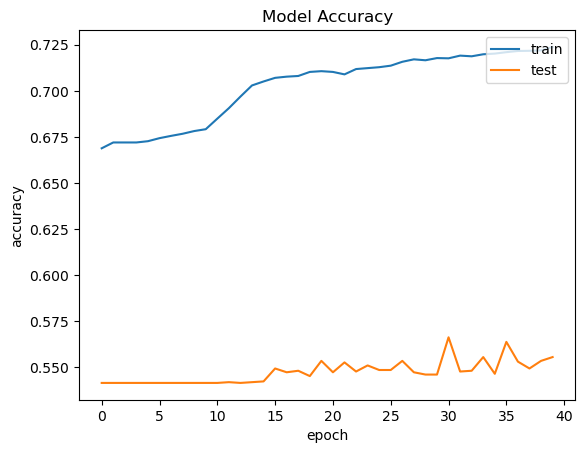

In [ ]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

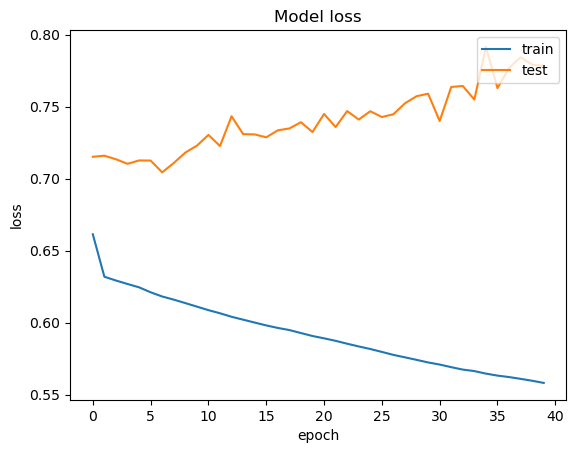

In [ ]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

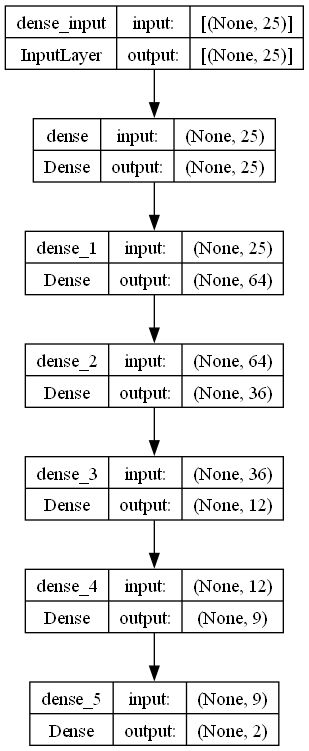

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Prediction

In [ ]:
predictions = model.predict(testSamples, batch_size = 10, verbose = 2)

679/679 - 1s - 1s/epoch - 1ms/step


In [ ]:
for i in predictions:
    print (i)

[0.30172348 0.6982765 ]
[0.3010412 0.6989589]
[0.30820113 0.6917988 ]
[0.30540642 0.69459355]
[0.30554974 0.69445026]
[0.30771706 0.692283  ]
[0.29783535 0.70216465]
[0.30263376 0.69736624]
[0.300697 0.699303]
[0.30083227 0.6991677 ]
[0.3048852  0.69511473]
[0.3030426 0.6969574]
[0.3045963 0.6954037]
[0.3048591  0.69514084]
[0.30520365 0.6947964 ]
[0.30638078 0.69361925]
[0.30307996 0.69692004]
[0.3083584  0.69164157]
[0.3252517 0.6747483]
[0.36267895 0.63732105]
[0.29526195 0.7047381 ]
[0.3277407 0.6722593]
[0.24918632 0.7508137 ]
[0.18802807 0.81197196]
[0.21073715 0.7892629 ]
[0.2216616  0.77833843]
[0.18876654 0.81123346]
[0.21932559 0.7806744 ]
[0.24740568 0.7525943 ]
[0.1999328  0.80006725]
[0.22912043 0.77087957]
[0.25333464 0.7466653 ]
[0.19548093 0.8045191 ]
[0.19709644 0.8029036 ]
[0.24181762 0.7581823 ]
[0.19748344 0.8025166 ]
[0.1791219 0.8208781]
[0.23283488 0.76716506]
[0.27919233 0.72080773]
[0.23482114 0.7651788 ]
[0.25895762 0.7410424 ]
[0.25894332 0.74105674]
[0.24653

In [ ]:
roundedValue = np.argmax(predictions, axis = -1)

In [ ]:
# for value in roundedValue:
#     print (value)

r =pd.DataFrame(roundedValue)
r.value_counts()

1    6308
0     477
dtype: int64

In [ ]:
t =pd.DataFrame(testLabels1)

In [ ]:
t.value_counts()

1    3973
0    2812
dtype: int64

In [ ]:
testDataSet.Feeling.value_counts()

2    3973
1    2812
Name: Feeling, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(roundedValue,testLabels1)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 184  293]
 [2628 3680]]


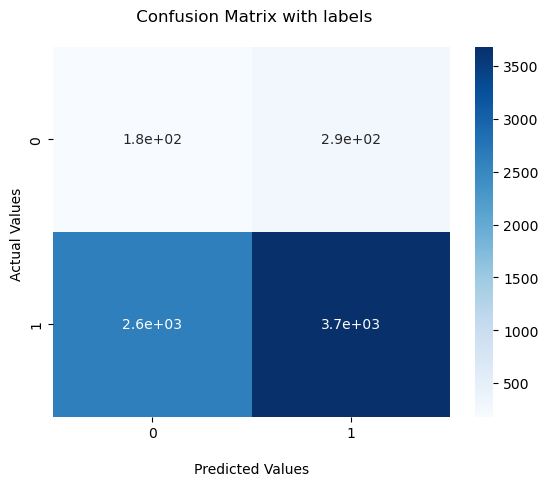

In [ ]:

import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])


plt.show()

<Axes: >

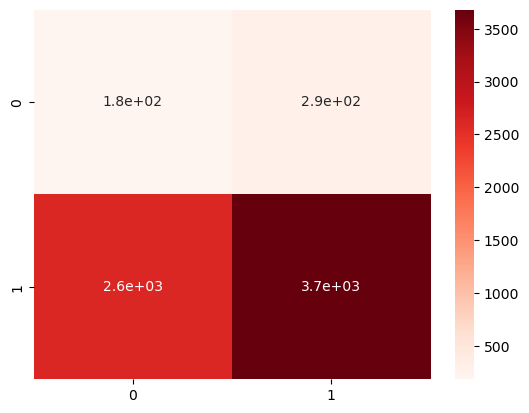

In [ ]:
import seaborn as sns
sns.heatmap(confusion, cmap='Reds', annot=True)

<Axes: title={'center': 'Comparison of all Feature Importances'}, xlabel='Feature Labels', ylabel='Feature Importance'>

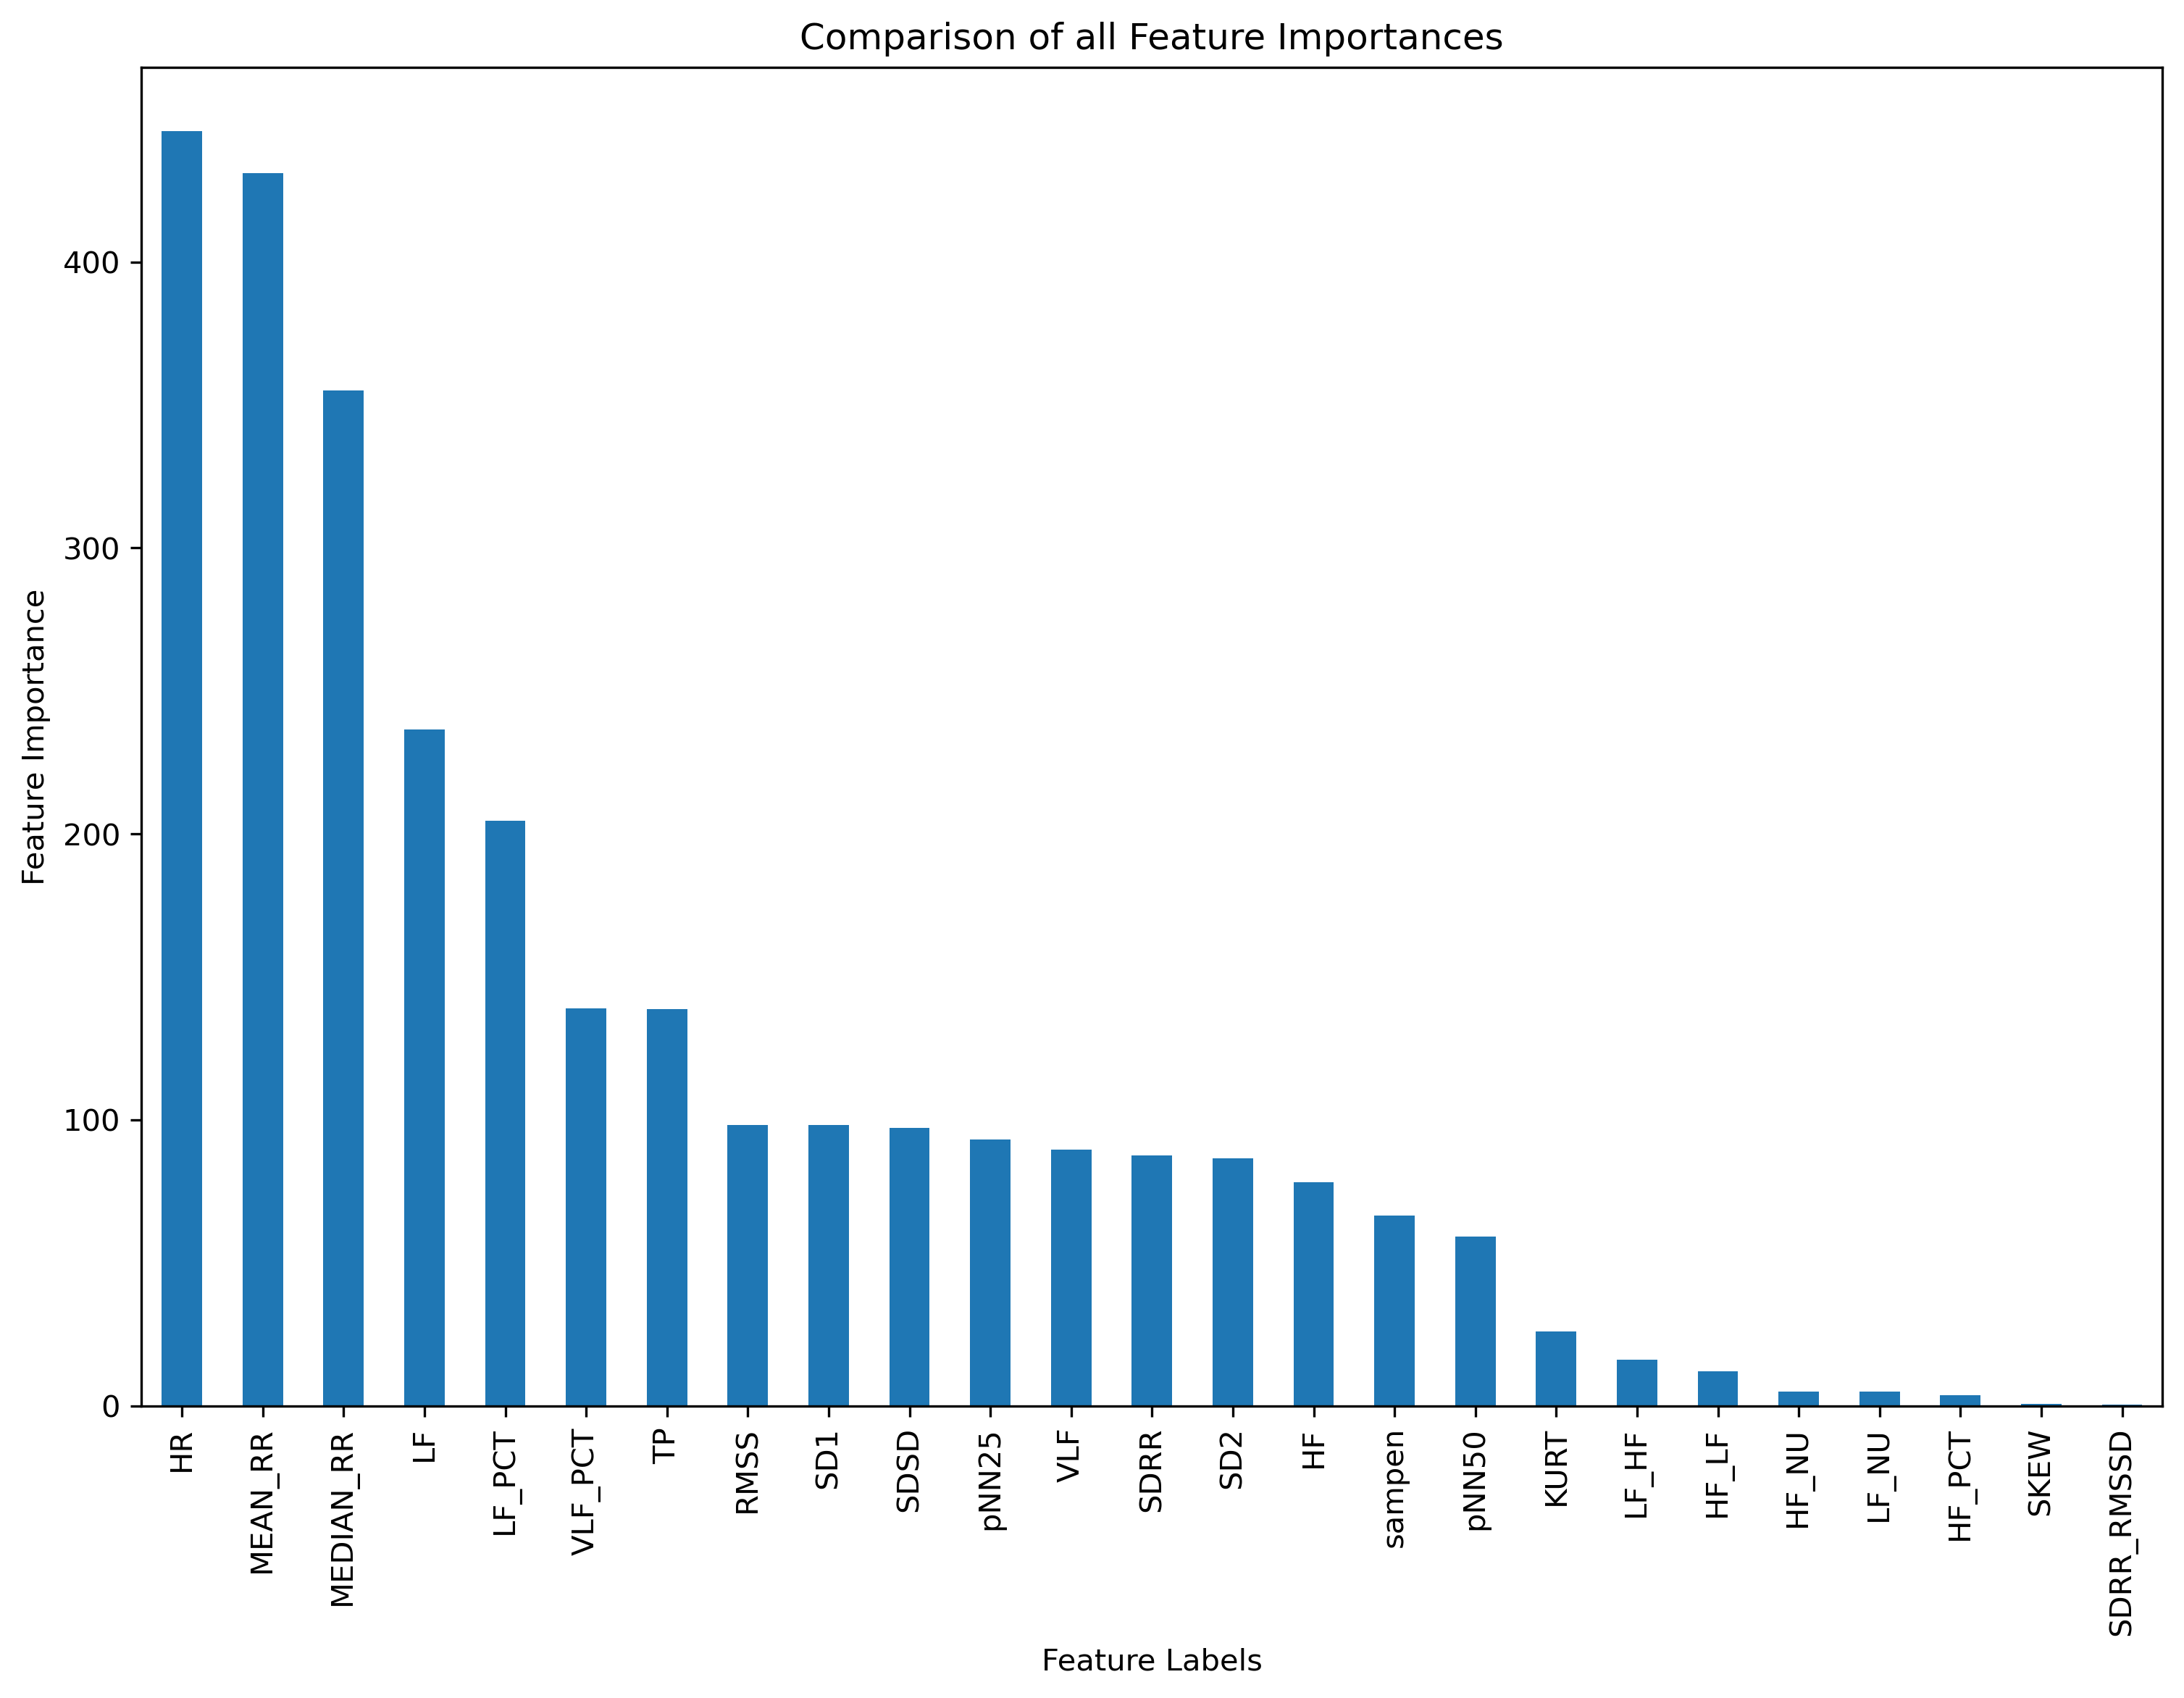

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif,k='all')
best_features.fit_transform(trainSamples, trainlabels1)

# trainDataSet_index = trainDataSet.columns[1:-1]
# trainDataSet_index_1 = trainDataSet_index[0:12]
# trainDataSet_index_2 = trainDataSet_index[20:]
# trainDataSet_index_selected = trainDataSet[trainDataSet_index_1] + trainDataSet[trainDataSet_index_2]


anova = pd.Series(data=best_features.scores_,index=trainDataSet.columns[1:-1])
anova = anova.sort_values(ascending=False)

plt.figure(figsize=(12, 8),dpi=300)
plt.xlabel("Feature Labels")
plt.ylabel("Feature Importance")
plt.title("Comparison of all Feature Importances")
anova.plot.bar()